### Project :: Evolution Strategies

![img](https://t4.ftcdn.net/jpg/00/17/46/81/240_F_17468143_wY3hsHyfNYoMdG9BlC56HI4JA7pNu63h.jpg)

Remember the idea behind Evolution Strategies? Here's a neat [blog post](https://blog.openai.com/evolution-strategies/) about 'em.

Can you reproduce their success? You will have to implement evolutionary strategies and see how they work.

This project is optional; has several milestones each worth a number of points [and swag].

__Milestones:__
* [10pts] Basic prototype of evolutionary strategies that works in one thread on CartPole
* [+5pts] Modify the code to make them work in parallel
* [+5pts] if you can run ES distributedly on at least two PCs
* [+10pts] Apply ES to play Atari Pong at least better than random
* [++] Additional points for all kinds of cool stuff besides milestones

__Rules:__

* This is __not a mandatory assignment__, but it's a way to learn some cool things if you're getting bored with default assignments.
* Once you decided to take on this project, please tell any of course staff members so that we can help ypu if you get stuck.
* There's a default implementation of ES in this [openai repo](https://github.com/openai/evolution-strategies-starter). It's okay to look there if you get stuck or want to compare your solutions, but each copy-pasted chunk of code should be understood thoroughly. We'll test that with questions.

### Tips on implementation

* It would be very convenient later if you implemented a function that takes policy weights, generates a session and returns policy changes -- so that you could then run a bunch of them in parallel.

* The simplest way you can do multiprocessing is to use [joblib](https://www.google.com/search?client=ubuntu&channel=fs&q=joblib&ie=utf-8&oe=utf-8)

* For joblib, make sure random variables are independent in each job. Simply add `np.random.seed()` at the beginning of your "job" function.

Later once you got distributed, you may need a storage that gathers gradients from all workers. In such case we recommend [Redis](https://redis.io/) due to it's simplicity.

Here's a speed-optimized saver/loader to store numpy arrays in Redis as strings.



In [9]:
import joblib
from six import BytesIO


def dumps(data):
    """converts whatever to string"""
    s = BytesIO()
    joblib.dump(data, s)
    return s.getvalue()


def loads(self, string):
    """converts string to whatever was dumps'ed in it"""
    return joblib.load(BytesIO(string))

### Tips on atari games
* There's all the pre-processing and tuning done for you in the code below
    * Images rescaled to 42x42 to speed up computation
    * We use last 4 frames as observations to account for ball velocity
    * The code below requires ```pip install Image``` and ```pip install gym[atari]``` 
    * You may also need some dependencies for gym[atari] - google "gym install all" dependencies or use our pre-built environment.
* The recommended agent architecture is a convolutional neural network. Dense network will also do.


May the force be with you!

In [11]:
from pong import make_pong
import numpy as np

env = make_pong()
print(env.action_space)

Discrete(6)


In [12]:
# get the initial state
s = env.reset()
print(s.shape)

(4, 42, 42)


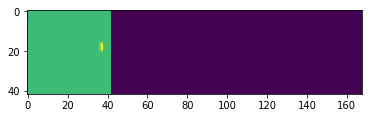

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot first observation. Only one frame
plt.imshow(s.swapaxes(1, 2).reshape(-1, s.shape[-1]).T)

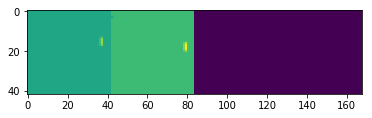

In [14]:
# next frame
new_s, r, done, _ = env.step(env.action_space.sample())
plt.imshow(new_s.swapaxes(1, 2).reshape(-1, s.shape[-1]).T)

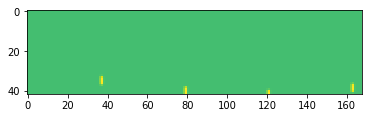

In [15]:
# after 10 frames
for _ in range(10):
    new_s, r, done, _ = env.step(env.action_space.sample())

plt.imshow(new_s.swapaxes(1, 2).reshape(-1, s.shape[-1]).T, vmin=0)

In [ ]:
< tons of your code here or elsewhere >